Load Libraries

In [27]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd
import sklearn
pd.set_option("display.max_columns", None, "display.max_rows", None)
import missingno as msno

Load NYC Airbnb data obtained from http://data.insideairbnb.com/united-states/ny/new-york-city/2021-08-04/data/listings.csv.gz

In [28]:
listings=pd.read_csv("https://raw.githubusercontent.com/rickfontenot/airbnb/main/airbnb_nyc_listings.csv?token=ARN5NNHQQO5DGH6T72FBV2DBGD342")


In [29]:
listings.head()


,id,listing_url,scrape_id,last_scraped,name,description,neighborhood_overview,picture_url,host_id,host_url,host_name,host_since,host_location,host_about,host_response_time,host_response_rate,host_acceptance_rate,host_is_superhost,host_thumbnail_url,host_picture_url,host_neighbourhood,host_listings_count,host_total_listings_count,host_verifications,host_has_profile_pic,host_identity_verified,neighbourhood,neighbourhood_cleansed,neighbourhood_group_cleansed,latitude,longitude,property_type,room_type,accommodates,bathrooms,bathrooms_text,bedrooms,beds,amenities,price,minimum_nights,maximum_nights,minimum_minimum_nights,maximum_minimum_nights,minimum_maximum_nights,maximum_maximum_nights,minimum_nights_avg_ntm,maximum_nights_avg_ntm,calendar_updated,has_availability,availability_30,availability_60,availability_90,availability_365,calendar_last_scraped,number_of_reviews,number_of_reviews_ltm,number_of_reviews_l30d,first_review,last_review,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,license,instant_bookable,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
0,2595,https://www.airbnb.com/rooms/2595,20210804005827,2021-08-04,Skylit Midtown Castle,"Beautiful, spacious skylit studio in the heart...",Centrally located in the heart of Manhattan ju...,https://a0.muscache.com/pictures/f0813a11-40b2...,2845,https://www.airbnb.com/users/show/2845,Jennifer,2008-09-09,"New York, New York, United States",A New Yorker since 2000! My passion is creatin...,NaN,NaN,NaN,f,https://a0.muscache.com/im/pictures/user/50fc5...,https://a0.muscache.com/im/pictures/user/50fc5...,Midtown,6.0,6.0,"['email', 'phone', 'reviews', 'offline_governm...",t,t,"New York, United States",Midtown,Manhattan,40.75356,-73.98559,Entire rental unit,Entire home/apt,1,NaN,1 bath,NaN,1.0,"[""Essentials"", ""Extra pillows and blankets"", ""...",$150.00,30,1125,30.0,30.0,1125.0,1125.0,30.0,1125.0,NaN,t,6,36,66,341,2021-08-04,48,0,0,2009-11-21,2019-11-04,4.70,4.72,4.62,4.76,4.79,4.86,4.41,NaN,f,3,3,0,0,0.34
1,3831,https://www.airbnb.com/rooms/3831,20210804005827,2021-08-04,"Whole flr w/private bdrm, bath & kitchen(pls r...","Enjoy 500 s.f. top floor in 1899 brownstone, w...",Just the right mix of urban center and local n...,https://a0.muscache.com/pictures/e49999c2-9fd5...,4869,https://www.airbnb.com/users/show/4869,LisaRoxanne,2008-12-07,"New York, New York, United States",Laid-back Native New Yorker (formerly bi-coast...,within a day,50%,88%,f,https://a0.muscache.com/im/users/4869/profile_...,https://a0.muscache.com/im/users/4869/profile_...,Clinton Hill,1.0,1.0,"['email', 'phone', 'reviews', 'offline_governm...",t,t,"Brooklyn, New York, United States",Bedford-Stuyvesant,Brooklyn,40.68494,-73.95765,Entire guest suite,Entire home/apt,3,NaN,1 bath,1.0,3.0,"[""Essentials"", ""TV with standard cable"", ""Baby...",$75.00,1,730,1.0,1.0,1125.0,1125.0,1.0,1125.0,NaN,t,0,1,7,212,2021-08-04,408,68,0,2015-01-05,2021-06-29,4.46,4.59,4.50,4.79,4.81,4.72,4.65,NaN,f,1,1,0,0,5.09
2,5121,https://www.airbnb.com/rooms/5121,20210804005827,2021-08-04,BlissArtsSpace!,<b>The space</b><br />HELLO EVERYONE AND THANK...,NaN,https://a0.muscache.com/pictures/2090980c-b68e...,7356,https://www.airbnb.com/users/show/7356,Garon,2009-02-03,"New York, New York, United States","I am an artist(painter, filmmaker) and curato...",within a day,100%,NaN,f,https://a0.muscache.com/im/pictures/user/72a61...,https://a0.muscache.com/im/pictures/user/72a61...,Bedford-Stuyvesant,1.0,1.0,"['email', 'phone', 'facebook', 'reviews', 'off...",t,t,NaN,Bedford-Stuyvesant,Brooklyn,40.68535,-73.95512,Private room in rental unit,Private room,2,NaN,NaN,1.0,1.0,"[""Long term stays allowed"", ""Air conditioning""...",$60.00,30,730,30.0,30.0,730.0,730.0,30.0,730.0,NaN,t,30,60,90,365,2021-08-04,50

Examine data types: Many variables need cleaning and conversion. Handle string replacements, boolean, and date variables individually before creating overall dictionary for all data types

In [30]:
listings.dtypes

id                                                int64
listing_url                                      object
scrape_id                                         int64
last_scraped                                     object
name                                             object
description                                      object
neighborhood_overview                            object
picture_url                                      object
host_id                                           int64
host_url                                         object
host_name                                        object
host_since                                       object
host_location                                    object
host_about                                       object
host_response_time                               object
host_response_rate                               object
host_acceptance_rate                             object
host_is_superhost                               

Boolean Variables: For variables with "t", "f" replace with True/False while preserving NA to be converted to boolean

In [31]:
#Create function to convert t/f to boolean, included if statement so it doesn't error if run multiple times
def tf_to_bool(dataframe, variable,name):
    if str(variable.dtypes)!='boolean':
        dataframe["temp_boolean"]=np.nan
        dataframe.temp_boolean = dataframe.temp_boolean.astype('boolean')
        dataframe.temp_boolean = np.where(
            variable == 't', True, np.where(
            variable ==  'f', False, np.nan))
        dataframe.temp_boolean = dataframe.temp_boolean.astype('boolean')
        dataframe = dataframe.drop(name, axis=1)    
        dataframe.rename({'temp_boolean': name}, axis=1, inplace=True)
        return dataframe
    else:
        return dataframe

listings = tf_to_bool(listings,listings.host_is_superhost,'host_is_superhost')
listings = tf_to_bool(listings,listings.host_has_profile_pic,'host_has_profile_pic')
listings = tf_to_bool(listings,listings.host_identity_verified,'host_identity_verified')
listings = tf_to_bool(listings,listings.has_availability,'has_availability')
listings = tf_to_bool(listings,listings.instant_bookable,'instant_bookable')


#listings.head()

#print(listings.loc[[2072]])


In [32]:
#Check count summaries for re-formatted boolean variables
print(listings.groupby('host_is_superhost').size())
print('NA count:',listings.host_is_superhost.isna().sum())

print(listings.groupby('host_has_profile_pic').size())
print('NA count:',listings.host_has_profile_pic.isna().sum())

print(listings.groupby('host_identity_verified').size())
print('NA count:',listings.host_identity_verified.isna().sum())

print(listings.groupby('has_availability').size())
print('NA count:',listings.has_availability.isna().sum())

print(listings.groupby('instant_bookable').size())
print('NA count:',listings.instant_bookable.isna().sum())


host_is_superhost
False    30069
True      6632
dtype: int64
NA count: 23
host_has_profile_pic
False      156
True     36545
dtype: int64
NA count: 23
host_identity_verified
False     6572
True     30129
dtype: int64
NA count: 23
has_availability
False     2096
True     34628
dtype: int64
NA count: 0
instant_bookable
False    26967
True      9757
dtype: int64
NA count: 0


Price Variable: Remove "$" and "," from string and convert to float

In [33]:
print(listings.price.dtypes) #initial type is object
print(listings.price.loc[[299]]) #original value "$2,500.00"
listings.price = listings.price.replace('[\$,]', '', regex=True).astype(float)
print(listings.price.dtypes) #transformed type is float64
print(listings.price.loc[[299]]) #new value is 2500.0


object
299    $2,500.00
Name: price, dtype: object
float64
299    2500.0
Name: price, dtype: float64


Columns with percentages need "%" removed to convert to numeric:
host_response_rate
host_acceptance_rate

In [34]:
print(listings.host_response_rate.dtypes) #initial type is object
print(listings.host_response_rate.loc[[299]]) #original value "100%"
listings.host_response_rate = listings.host_response_rate.replace('%', '', regex=True).astype(float)
listings.host_acceptance_rate = listings.host_acceptance_rate.replace('%', '', regex=True).astype(float)
print(listings.host_response_rate.dtypes) #transformed type is float64
print(listings.host_response_rate.loc[[299]]) #new value is 100.0

object
299    100%
Name: host_response_rate, dtype: object
float64
299    100.0
Name: host_response_rate, dtype: float64


Date variables need to be converted based on string format before just updated the data type

In [35]:
date_vars = ['last_scraped','host_since','calendar_last_scraped','first_review','last_review']
listings[date_vars] =  listings[date_vars].apply(pd.to_datetime, format='%Y-%m-%d', errors ='coerce')


The bathrooms_text string variable contains both the numeric count of bathrooms as well as a categorical value for private vs. shared. Create dictionary to parse strings and create two new variables of correct type

In [36]:
#convert nAn values to 'NA' for parsing, will change back to nAn after splitting
listings['bathrooms_text'] = listings['bathrooms_text'].astype(object).replace(np.nan, 'NA')

#Create translation dictionary since description formats are not consistent
transdict = {'1 bath': '1 private', 
             'NA': 'NA',
             '1.5 baths': '1.5 private',
             '1 shared bath': '1 shared', 
             '1 private bath': '1 private',
             'Shared half-bath': '0.5 shared',
             '2 baths': '2 private',
             '1.5 shared baths': '1.5 shared',
             '3 baths': '3 private',
             'Half-bath': '0.5 private',
             '2.5 baths': '2.5 private', 
             '2 shared baths': '2 shared',
             '0 baths' : '0 private',
             '4 baths':'4 private', 
             '0 shared baths': '0 shared',
             'Private half-bath': '0.5 private',  
             '4.5 baths' :'4.5 private', 
             '5.5 baths': '5.5 private' , 
             '2.5 shared baths': '2.5 shared',
             '3.5 baths': '3.5 private', 
             '15.5 baths': '15.5 private', 
             '5 baths': '5 private', 
             '3 shared baths': '3 shared', 
             '4 shared baths': '4 shared',
             '6 baths': '6 private', 
             '3.5 shared baths': '3.5 private', 
             '6 shared baths' : '6 shared',
             '6.5 shared baths': '6.5 shared', 
             '4.5 shared baths' :'4.5 private',
             '5.5 shared baths' : '5.5 private', 
             '7.5 baths': '7.5 private', 
             '5 shared baths': '5 shared',
             '6.5 baths': '6.5 private', 
             '8 baths': '8 private', 
             '7 shared baths':'7 shared', 
             '7 baths': '7 private', 
             '10 baths': '10 private'}

#use trandict to iterate over bathrooms_text column
listings['bathrooms_text'] = [transdict[letter] for letter in listings['bathrooms_text']]

#use str.split to create two new columns 'num_baths' and 'bath_type'
listings[['num_baths','bath_type']] = listings['bathrooms_text'].str.split(' ', 1, expand = True)

#For num_baths convert 'NA' values back to nan and convert type to float
listings['num_baths'] = listings['num_baths'].astype(object).replace( 'NA',np.nan)
listings['num_baths'] = listings['num_baths'].astype(np.float16)

#For bath type convert 'NA' values back to nan and convert type to category
listings.bath_type.fillna(value=np.nan, inplace=True)
listings['bath_type'] = listings['bath_type'].astype('category')
 


In [37]:
#Confirm conversions for bathroom text
print(listings.num_baths.dtypes) #transformed type is float16
print(listings.num_baths.unique())
print(listings.bath_type.dtypes) #transformed type is category
print(listings.bath_type.unique()) 

#Drop original bathrooms_text column now that replaced by two new variables
listings.drop('bathrooms_text', axis=1, inplace=True)

float16
[ 1.   nan  1.5  0.5  2.   3.   2.5  0.   4.   4.5  5.5  3.5 15.5  5.
  6.   6.5  7.5  8.   7.  10. ]
category
['private', NaN, 'shared']
Categories (2, object): ['private', 'shared']


Check current data types for all variables before converting to final proper types

In [38]:
print(listings.dtypes)

id                                                       int64
listing_url                                             object
scrape_id                                                int64
last_scraped                                    datetime64[ns]
name                                                    object
description                                             object
neighborhood_overview                                   object
picture_url                                             object
host_id                                                  int64
host_url                                                object
host_name                                               object
host_since                                      datetime64[ns]
host_location                                           object
host_about                                              object
host_response_time                                      object
host_response_rate                                     

Create Data Type dictionary and convert all variables to proper format and bit sizes.

In [39]:
convert_dict = {'id': 'Int16',
'scrape_id': 'Int64',
'last_scraped': 'datetime64[ns]',
'host_id': 'Int16',
'host_name': str,
'host_since': 'datetime64[ns]',
'calendar_last_scraped': 'datetime64[ns]',
'host_response_time': 'category',
'host_response_rate': 'Int16',
'host_acceptance_rate': 'Int16',
'host_is_superhost': bool,
'host_neighbourhood': 'category',
'host_listings_count': 'Int16',
'host_total_listings_count': 'Int16',
'host_verifications': str,
'host_has_profile_pic': bool,
'host_identity_verified': bool,
'neighbourhood': str,
'neighbourhood_cleansed': 'category',
'neighbourhood_group_cleansed': 'category',
'property_type': 'category',
'room_type': 'category',
'accommodates': 'Int16',
'bedrooms': 'Int16',
'beds': 'Int16',
'amenities': str,
'price': 'float16',
'minimum_nights': 'Int16',
'maximum_nights': 'Int16',
'minimum_minimum_nights': 'Int16',
'maximum_minimum_nights': 'Int16',
'minimum_maximum_nights': 'Int16',
'maximum_maximum_nights': 'Int16',
'minimum_nights_avg_ntm': 'Int16',
'maximum_nights_avg_ntm': 'Int16',
'has_availability': bool,
'availability_30': 'Int16',
'availability_60': 'Int16',
'availability_90': 'Int16',
'availability_365': 'Int16',
'number_of_reviews': 'Int16',
'number_of_reviews_ltm': 'Int16',
'number_of_reviews_l30d': 'Int16',
'first_review': 'datetime64[ns]',
'last_review': 'datetime64[ns]',
'review_scores_rating': 'float16',
'review_scores_accuracy': 'float16',
'review_scores_cleanliness': 'float16',
'review_scores_checkin': 'float16',
'review_scores_communication': 'float16',
'review_scores_location': 'float16',
'review_scores_value': 'float16',
'instant_bookable': bool,
'calculated_host_listings_count': 'Int16',
'calculated_host_listings_count_entire_homes': 'Int16',
'calculated_host_listings_count_private_rooms': 'Int16',
'calculated_host_listings_count_shared_rooms': 'Int16',
'reviews_per_month': 'float16',
'num_baths': 'float16',
'bath_type': 'category'
               }
  
listings = listings.astype(convert_dict, errors='ignore')
print(listings.dtypes)

id                                                       int64
listing_url                                             object
scrape_id                                                Int64
last_scraped                                    datetime64[ns]
name                                                    object
description                                             object
neighborhood_overview                                   object
picture_url                                             object
host_id                                                  int64
host_url                                                object
host_name                                               object
host_since                                      datetime64[ns]
host_location                                           object
host_about                                              object
host_response_time                                    category
host_response_rate                                     

Check missing values

In [261]:
listings.isna().sum()

# print(listings.neighbourhood.iloc[2])
# print('isna: ',listings.neighbourhood.isna().iloc[2])
# print('isnull: ',listings.neighbourhood.isnull().iloc[2])
# print('==nan: ',(listings.neighbourhood.iloc[2]=='nan'))
# print('is None: ',(listings.neighbourhood.iloc[2] is None))
# print('== None: ',(listings.neighbourhood.iloc[2] == None))
# print('in [np.nan]: ',(listings.neighbourhood.iloc[2] in [np.nan]))
# print('== float(nan): ',(listings.neighbourhood.iloc[2] == float('nan')))
# import math
# print('pd.isna: ',pd.isna(listings.neighbourhood.iloc[2] is math.nan))


# def isNaN(num):
#     return num!= num

# x=float(listings.neighbourhood.iloc[2])
# print(x)
# print(isNaN(x))

# print(listings.neighbourhood.iloc[1])
#y=float(listings.neighbourhood.iloc[1]) ##produces error cannot convert string to float
#print(y)
#print(isNaN(y))








id                                                  0
listing_url                                         0
scrape_id                                           0
last_scraped                                        0
name                                               13
description                                      1236
neighborhood_overview                           14133
picture_url                                         0
host_id                                             0
host_url                                            0
host_name                                           0
host_since                                         23
host_location                                     119
host_about                                      15032
host_response_time                              15676
host_response_rate                              15676
host_acceptance_rate                            15186
host_thumbnail_url                                 23
host_picture_url            

In [252]:
string = str(listings.neighbourhood.iloc[2])
print(string)
print('==nan: ',(string=='nan'))

string2 = str(listings.neighbourhood.iloc[1])
print(string2)
print('==nan: ',(string2=='nan'))

print(listings.neighbourhood.iloc[2],": ",(str(listings.neighbourhood.iloc[2])=='nan'))
print(listings.neighbourhood.iloc[1],": ",(str(listings.neighbourhood.iloc[1])=='nan'))





nan
==nan:  True
Brooklyn, New York, United States
==nan:  False
nan :  True
Brooklyn, New York, United States :  False
False


In [264]:
#neighbourhood = listings.neighbourhood
#print(neighbourhood)

#listings['neighbourhood_missing'] = np.where(str(listings.neighbourhood)=='nan', True, False)

def f(row):
    if str(row['neighbourhood']) == 'nan':
        val = np.nan
    else:
        val = row['neighbourhood']
    return val

listings['neighbourhood'] = listings.apply(f, axis=1)

#print(listings.neighbourhood_missing)


listings.isna().sum()



id                                                  0
listing_url                                         0
scrape_id                                           0
last_scraped                                        0
name                                               13
description                                      1236
neighborhood_overview                           14133
picture_url                                         0
host_id                                             0
host_url                                            0
host_name                                           0
host_since                                         23
host_location                                     119
host_about                                      15032
host_response_time                              15676
host_response_rate                              15676
host_acceptance_rate                            15186
host_thumbnail_url                                 23
host_picture_url            

Drop Columns with 100% missing values (i.e. blank variables)

In [41]:
listings = listings.drop(['bathrooms','calendar_updated','license'], axis=1)

Examine Summary statistics for all numerical values

In [42]:
numerical =['float', 'float16', 'float64', 'Int16']
listings.describe(include = numerical)


,host_response_rate,host_acceptance_rate,host_listings_count,host_total_listings_count,latitude,longitude,accommodates,bedrooms,beds,price,minimum_nights,minimum_minimum_nights,maximum_minimum_nights,minimum_maximum_nights,maximum_maximum_nights,minimum_nights_avg_ntm,maximum_nights_avg_ntm,availability_30,availability_60,availability_90,availability_365,number_of_reviews,number_of_reviews_ltm,number_of_reviews_l30d,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month,num_baths
count,21048.000000,21538.000000,36701.000000,36701.000000,36724.000000,36724.000000,36724.000000,32855.000000,36130.000000,36724.0,36724.000000,36707.000000,36707.000000,3.670700e+04,3.670700e+04,36707.000000,3.670700e+04,36724.000000,36724.000000,36724.000000,36724.000000,36724.000000,36724.000000,36724.000000,2.730900e+04,2.666100e+04,2.667200e+04,2.665300e+04,2.666400e+04,2.664900e+04,2.664900e+04,36724.000000,36724.000000,36724.000000,36724.000000,27309.000000,36615.000000
mean,86.330958,75.619603,29.424975,29.424975,40.729355,-73.949582,2.800920,1.329569,1.533518,inf,22.482083,22.743700,28.261095,2.166532e+06,3.687623e+06,27.845888,3.002346e+06,7.035862,16.733145,28.271185,122.570608,22.854836,3.766638,0.472579,inf,inf,inf,inf,inf,inf,inf,13.432306,6.581173,6.718168,0.055958,1.375977,1.162109
std,27.209218,30.419117,181.468593,181.468593,0.055562,0.049611,1.869686,0.726060,1.133531,inf,28.361534,32.850257,68.415571,6.814654e+07,8.889121e+07,66.578819,7.736590e+07,10.545903,21.867356,34.031130,138.765815,49.188479,13.591386,1.686377,8.637695e-01,4.858398e-01,5.722656e-01,4.335938e-01,4.538574e-01,4.143066e-01,5.083008e-01,46.293004,29.919717,31.166125,0.469707,3.849609,0.467773
min,0.000000,0.000000,0.000000,0.000000,40.508630,-74.241350,0.000000,1.000000,0.000000,0.0,1.000000,1.000000,1.000000,1.000000e+00,1.000000e+00,1.000000,1.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.000000,0.000000,0.000000,0.000000,0.010002,0.000000
25%,90.000000,64.000000,1.000000,1.000000,40.689530,-73.983170,2.000000,1.000000,1.000000,67.0,3.000000,3.000000,3.000000,3.650000e+02,3.650000e+02,3.000000,3.650000e+02,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4.558594e+00,4.710938e+00,4.500000e+00,4.820312e+00,4.828125e+00,4.671875e+00,4.558594e+00,1.000000,0.000000,0.000000,0.000000,0.109985,1.000000
50%,100.000000,89.000000,1.000000,1.000000,40.725530,-73.954990,2.000000,1.000000,1.000000,108.0,30.000000,30.000000,30.000000,1.125000e+03,1.125000e+03,30.000000,1.125000e+03,0.000000,2.000000,5.000000,57.000000,4.000000,0.000000,0.000000,4.820312e+00,4.910156e+00,4.800781e+00,4.960938e+00,4.980469e+00,4.878906e+00,4.789062e+00,1.000000,1.000000,0.000000,0.000000,0.419922,1.000000
75%,100.000000,99.000000,3.000000,3.000000,40.762752,-73.931330,4.000000,1.000000,2.000000,175.0,30.000000,30.000000,30.000000,1.125000e+03,1.125000e+03,30.000000,1.125000e+03,12.000000,33.000000,61.000000,259.000000,19.000000,2.000000,0.000000,5.000000e+00,5.000000e+00,5.000000e+00,5.000000e+00,5.000000e+00,5.000000e+00,5.000000e+00,3.000000,1.000000,1.000000,0.000000,1.450195,1.000000
max,100.000000,100.000000,3966.000000,3966.000000,40.911390,-73.705220,16.000000,14.000000,42.000000,10000.0,1250.000000,1250.000000,1250.000000,2.147484e+09,2.147484e+09,1250.000000,2.147484e+09,30.000000,60.000000,90.000000,365.000000,998.000000,669.000000,172.000000,5.000000e+00,5.000000e+00,5.000000e+00,5.000000e+00,5.000000e+00,5.000000e+00,5.000000e+00,335.000000,286.000000,276.000000,8.000000,192.875000,15.500000


In [266]:
categorical = ['object', 'category', 'boolean', 'datetime64[ns]']
listings.describe(include = categorical)

<ipython-input-266-79ea1b1eec41>:2: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  listings.describe(include = categorical)
<ipython-input-266-79ea1b1eec41>:2: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  listings.describe(include = categorical)
<ipython-input-266-79ea1b1eec41>:2: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  listings.describe(include = categorical)
<ipython-input-266-79e

,listing_url,last_scraped,name,description,neighborhood_overview,picture_url,host_url,host_name,host_since,host_location,host_about,host_response_time,host_thumbnail_url,host_picture_url,host_neighbourhood,host_verifications,neighbourhood,neighbourhood_cleansed,neighbourhood_group_cleansed,property_type,room_type,amenities,calendar_last_scraped,first_review,last_review,host_is_superhost,host_has_profile_pic,host_identity_verified,has_availability,instant_bookable,bath_type,response_missing,neighbourhood_missing
count,36724,36724,36711,35488,22591,36724,36724,36724,36701,36605,21692,21048,36701,36701,29853,36724,22592,36724,36724,36724,36724,36724,36724,27309,27309,36701,36701,36701,36724,36724,36615,36724,22592
unique,36724,3,35572,33318,18596,35678,25690,9013,4157,1591,14550,4,25544,25544,449,530,208,223,5,75,4,30485,3,3081,2451,2,2,2,2,2,2,2,208
top,https://www.airbnb.com/rooms/4044906,2021-08-04 00:00:00,Water View King Bed Hotel Room,Relax in out Timeless European Designed Rooms ...,The Greenpoint House in only a few short block...,https://a0.muscache.com/pictures/6998e77e-4564...,https://www.airbnb.com/users/show/305240193,June,2019-10-29 00:00:00,"New York, New York, United States","At June Homes, our mission is to make renting ...",within an hour,https://a0.muscache.com/im/pictures/user/4adc1...,https://a0.muscache.com/im/pictures/user/4adc1...,Williamsburg,"['email', 'phone']","New York, United States",Bedford-Stuyvesant,Manhattan,Entire rental unit,Entire home/apt,"[""Long term stays allowed""]",2021-08-04 00:00:00,2020-01-01 00:00:00,2021-08-01 00:00:00,False,True,True,True,False,private,not_missing,"New York, United States"
freq,1,30202,30,29,56,37,335,342,349,21287,335,10319,335,335,2132,3395,9374,2690,16105,15445,19484,132,30202,137,630,30069,36545,30129,34628,26967,25260,21048,9374
first,NaN,2021-08-04 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,2008-08-22 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2021-08-04 00:00:00,2009-08-09 00:00:00,2010-12-21 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
last,NaN,2021-08-08 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,2021-08-01 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2021-08-08 00:00:00,2021-08-04 00:00:00,2021-08-04 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Business Understanding (Joe)

Describe the purpose of the data set you selected (i.e., why was this data collected in the first place?). Describe how you would define and measure the outcomes from the dataset. That is, why is this data important and how do you know if you have mined useful knowledge from the dataset? How would you measure the effectiveness of a good prediction algorithm? Be specific.

Data Meaning Type (Joe)

Describe the meaning and type of data (scale, values, etc.) for each attribute in the data file.

In [44]:
Data Quality (DJ)

Verify data quality: Explain any missing values, duplicate data, and outliers. Are those mistakes?
How do you deal with these problems? Give justifications for your methods.

SyntaxError: invalid syntax (<ipython-input-44-8ea048ba06c6>, line 1)

Simple Statistics (Puri)

Visualize appropriate statistics (e.g., range, mode, mean, median, variance, counts) for a subset of attributes. Describe anything meaningful you found from this or if you found something potentially interesting. Note: You can also use data from other sources for comparison. Explain why the statistics run are meaningful. 

Visualize Attributes (Puri)

Visualize the most interesting attributes (at least 5 attributes, your opinion on what is interesting). Important: Interpret the implications for each visualization. Explain for each attribute why the chosen visualization is appropriate.

Explore Joint Attributes (DJ)

Visualize relationships between attributes: Look at the attributes via scatter plots, correlation, cross-tabulation, group-wise averages, etc. as appropriate. Explain any interesting relationships.

## Explore Attributes and Class (Rick)

Identify and explain interesting relationships between features and the class you are trying to predict (i.e., relationships with variables and the target classification).

In [ ]:
print(listings.groupby('host_is_superhost').size())
print('NA count:',listings.host_is_superhost.isna().sum())


host_is_superhost
False    30069
True      6632
dtype: int64
NA count: 23


Superhost Summary
There are 6632 Superhosts which is 18.1% of the total hosts in NYC
23 Missing Values

Examine Categorical variables vs. Super Host

<AxesSubplot:xlabel='bath_type'>

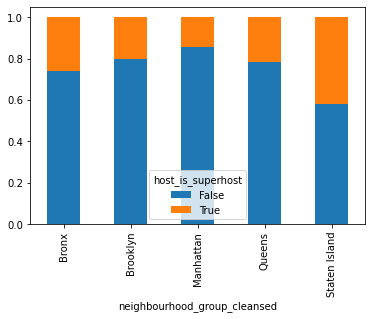

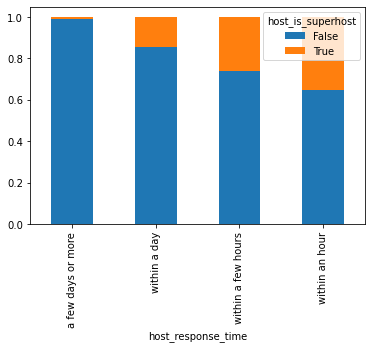

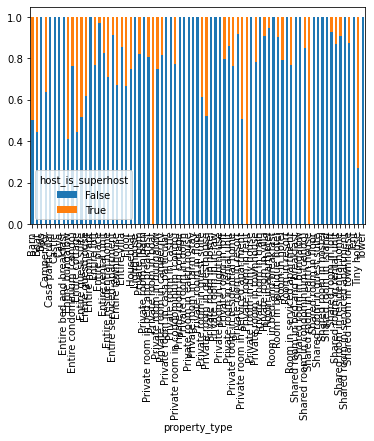

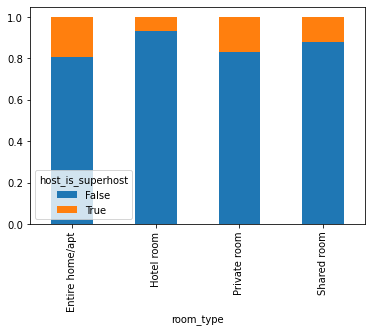

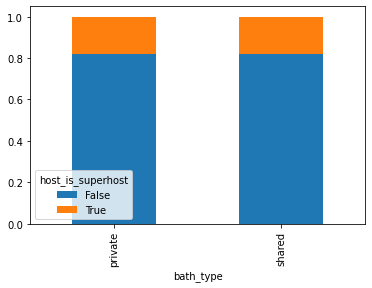

In [77]:
from statsmodels.graphics.mosaicplot import mosaic
from itertools import product
#mosaic(listings,['host_is_superhost','neighbourhood_group_cleansed'])

neighbourhood_group_cleansed  = pd.DataFrame(pd.crosstab(listings.neighbourhood_group_cleansed, listings.host_is_superhost, normalize='index'))
neighbourhood_group_cleansed.plot.bar(stacked=True)

#neighbourhood_group_cleansed['Superhost'] = neighbourhood_group_cleansed.True / neighbourhood_group_cleansed.All
#neighbourhood_group_cleansed  = pd.DataFrame(pd.crosstab(listings.neighbourhood_group_cleansed, listings.host_is_superhost, normalize='index'))

host_response_time = pd.DataFrame(pd.crosstab(listings.host_response_time, listings.host_is_superhost, normalize='index'))
host_response_time.plot.bar(stacked=True)

property_type = pd.DataFrame(pd.crosstab(listings.property_type, listings.host_is_superhost, normalize='index'))
property_type.plot.bar(stacked=True)

room_type = pd.DataFrame(pd.crosstab(listings.room_type, listings.host_is_superhost, normalize='index'))
room_type.plot.bar(stacked=True)

bath_type = pd.DataFrame(pd.crosstab(listings.bath_type, listings.host_is_superhost, normalize='index'))
bath_type.plot.bar(stacked=True)

Examine Numerical variables vs. Super Host

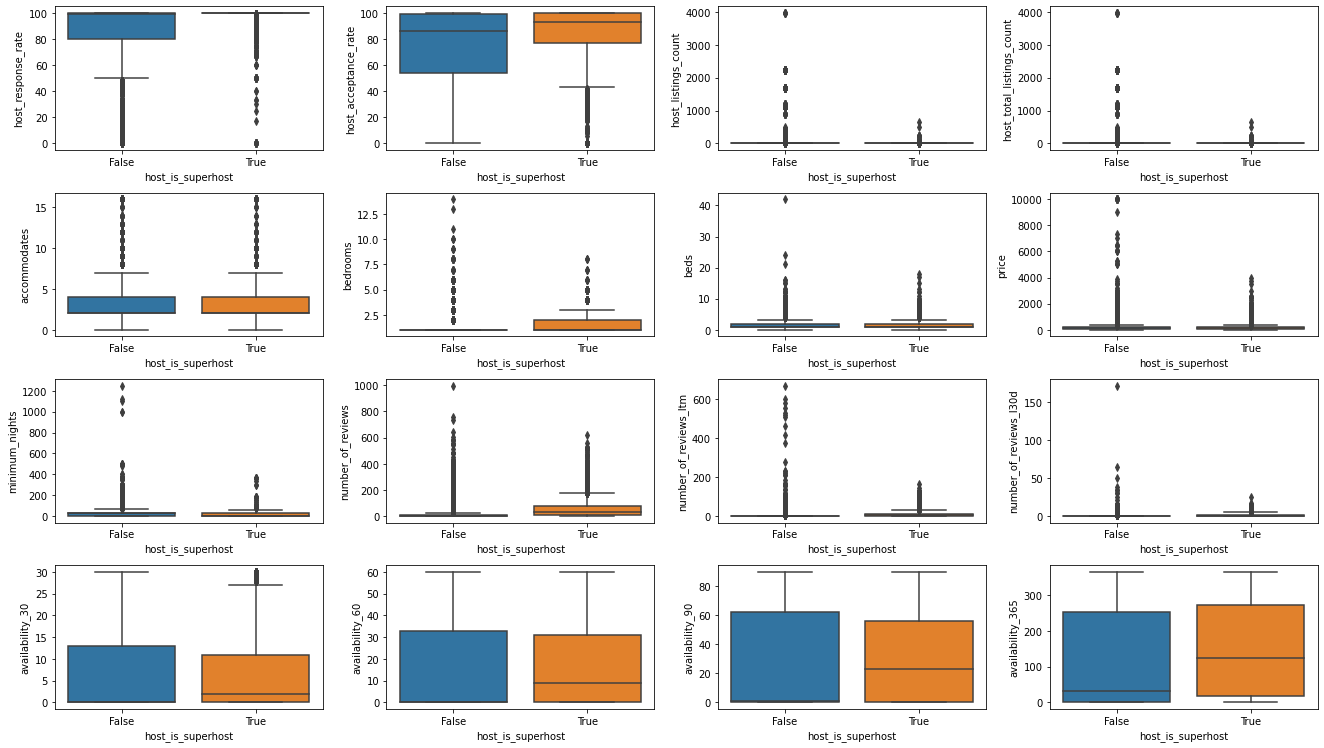

In [93]:
plt.close('all')
fig, axes = plt.subplots(4, 4)
fig.set_size_inches(18.5, 10.5)
#fig.tight_layout()

ax = sns.boxplot(x="host_is_superhost", y="host_response_rate", data=listings[listings.host_is_superhost.notna()], orient='v', 
    ax=axes[0, 0])
ax = sns.boxplot(x="host_is_superhost", y="host_acceptance_rate", data=listings[listings.host_is_superhost.notna()], orient='v', 
    ax=axes[0, 1])
ax = sns.boxplot(x="host_is_superhost", y="host_listings_count", data=listings[listings.host_is_superhost.notna()], orient='v', 
    ax=axes[0, 2])
ax = sns.boxplot(x="host_is_superhost", y="host_total_listings_count", data=listings[listings.host_is_superhost.notna()], orient='v', 
    ax=axes[0, 3])

ax = sns.boxplot(x="host_is_superhost", y="accommodates", data=listings[listings.host_is_superhost.notna()], orient='v', 
    ax=axes[1, 0])
ax = sns.boxplot(x="host_is_superhost", y="bedrooms", data=listings[listings.host_is_superhost.notna()], orient='v', 
    ax=axes[1, 1])
ax = sns.boxplot(x="host_is_superhost", y="beds", data=listings[listings.host_is_superhost.notna()], orient='v', 
    ax=axes[1, 2])
ax = sns.boxplot(x="host_is_superhost", y="price", data=listings[listings.host_is_superhost.notna()], orient='v', 
    ax=axes[1, 3])

ax = sns.boxplot(x="host_is_superhost", y="minimum_nights", data=listings[listings.host_is_superhost.notna()], orient='v', 
    ax=axes[2, 0])
ax = sns.boxplot(x="host_is_superhost", y="number_of_reviews", data=listings[listings.host_is_superhost.notna()], orient='v', 
    ax=axes[2, 1])
ax = sns.boxplot(x="host_is_superhost", y="number_of_reviews_ltm", data=listings[listings.host_is_superhost.notna()], orient='v', 
    ax=axes[2, 2])
ax = sns.boxplot(x="host_is_superhost", y="number_of_reviews_l30d", data=listings[listings.host_is_superhost.notna()], orient='v', 
    ax=axes[2, 3])

ax = sns.boxplot(x="host_is_superhost", y="availability_30", data=listings[listings.host_is_superhost.notna()], orient='v', 
    ax=axes[3, 0])
ax = sns.boxplot(x="host_is_superhost", y="availability_60", data=listings[listings.host_is_superhost.notna()], orient='v', 
    ax=axes[3, 1])
ax = sns.boxplot(x="host_is_superhost", y="availability_90", data=listings[listings.host_is_superhost.notna()], orient='v', 
    ax=axes[3, 2])
ax = sns.boxplot(x="host_is_superhost", y="availability_365", data=listings[listings.host_is_superhost.notna()], orient='v', 
    ax=axes[3, 3])

plt.tight_layout()


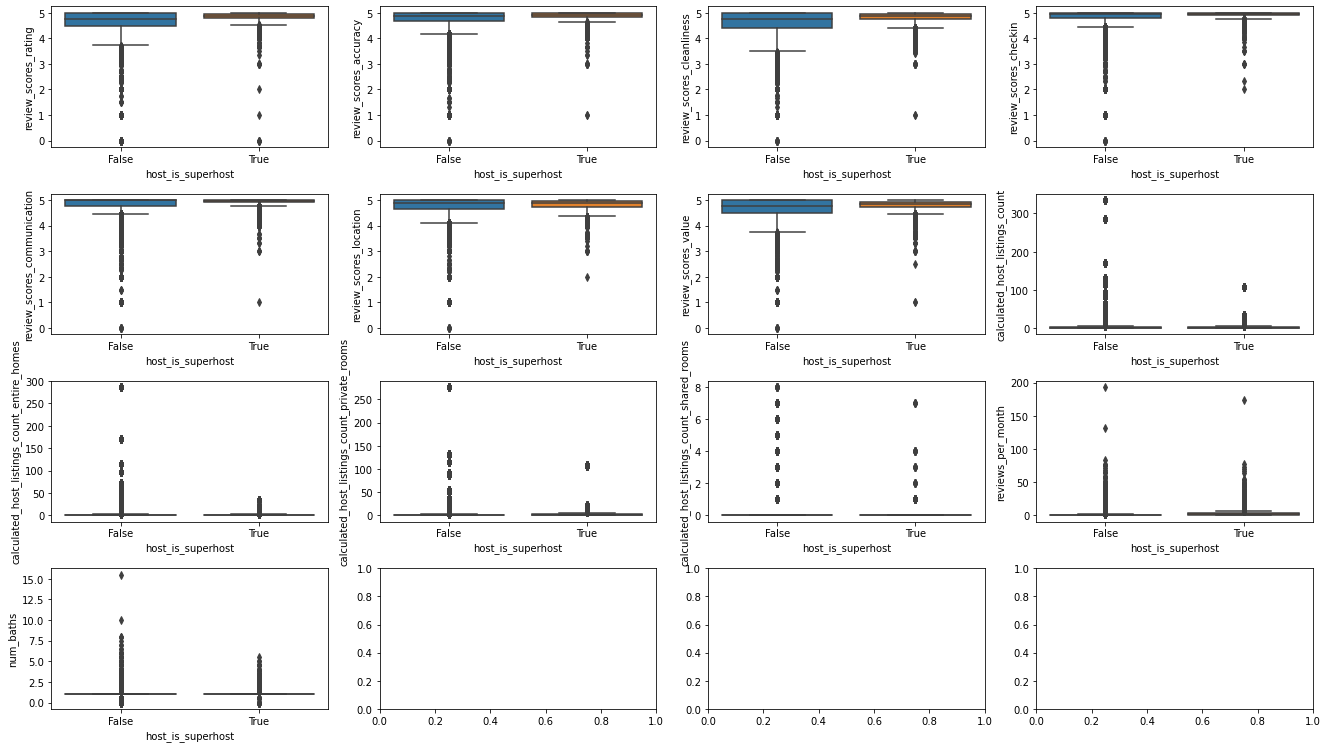

In [94]:
plt.close('all')
fig, axes = plt.subplots(4, 4)
fig.set_size_inches(18.5, 10.5)
#fig.tight_layout()

ax = sns.boxplot(x="host_is_superhost", y="review_scores_rating", data=listings[listings.host_is_superhost.notna()], orient='v', 
    ax=axes[0, 0])
ax = sns.boxplot(x="host_is_superhost", y="review_scores_accuracy", data=listings[listings.host_is_superhost.notna()], orient='v', 
    ax=axes[0, 1])
ax = sns.boxplot(x="host_is_superhost", y="review_scores_cleanliness", data=listings[listings.host_is_superhost.notna()], orient='v', 
    ax=axes[0, 2])
ax = sns.boxplot(x="host_is_superhost", y="review_scores_checkin", data=listings[listings.host_is_superhost.notna()], orient='v', 
    ax=axes[0, 3])

ax = sns.boxplot(x="host_is_superhost", y="review_scores_communication", data=listings[listings.host_is_superhost.notna()], orient='v', 
    ax=axes[1, 0])
ax = sns.boxplot(x="host_is_superhost", y="review_scores_location", data=listings[listings.host_is_superhost.notna()], orient='v', 
    ax=axes[1, 1])
ax = sns.boxplot(x="host_is_superhost", y="review_scores_value", data=listings[listings.host_is_superhost.notna()], orient='v', 
    ax=axes[1, 2])
ax = sns.boxplot(x="host_is_superhost", y="calculated_host_listings_count", data=listings[listings.host_is_superhost.notna()], orient='v', 
    ax=axes[1, 3])

ax = sns.boxplot(x="host_is_superhost", y="calculated_host_listings_count_entire_homes", data=listings[listings.host_is_superhost.notna()], orient='v', 
    ax=axes[2, 0])
ax = sns.boxplot(x="host_is_superhost", y="calculated_host_listings_count_private_rooms", data=listings[listings.host_is_superhost.notna()], orient='v', 
    ax=axes[2, 1])
ax = sns.boxplot(x="host_is_superhost", y="calculated_host_listings_count_shared_rooms", data=listings[listings.host_is_superhost.notna()], orient='v', 
    ax=axes[2, 2])
ax = sns.boxplot(x="host_is_superhost", y="reviews_per_month", data=listings[listings.host_is_superhost.notna()], orient='v', 
    ax=axes[2, 3])

ax = sns.boxplot(x="host_is_superhost", y="num_baths", data=listings[listings.host_is_superhost.notna()], orient='v', 
    ax=axes[3, 0])


plt.tight_layout()


Examine date attributes vs. superhost status

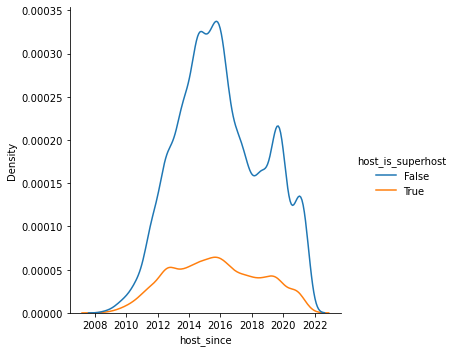

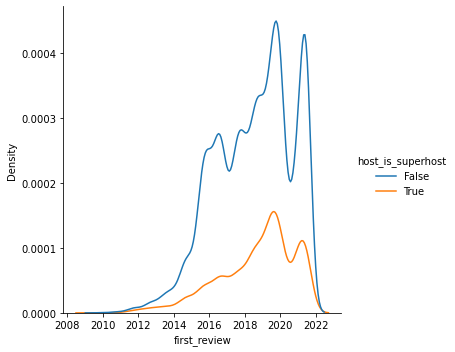

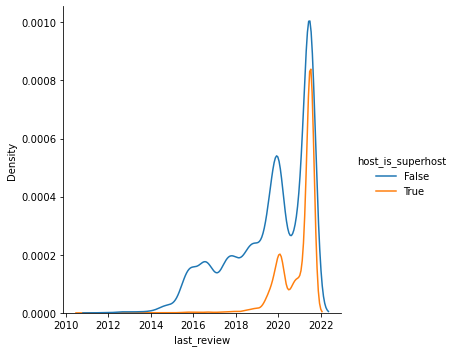

In [110]:

sns.displot(data=listings[listings.host_is_superhost.notna()], x="host_since", hue="host_is_superhost", kind="kde")
sns.displot(data=listings[listings.host_is_superhost.notna()], x="first_review", hue="host_is_superhost", kind="kde")
sns.displot(data=listings[listings.host_is_superhost.notna()], x="last_review", hue="host_is_superhost", kind="kde")

sns.displot(data=listings[listings.host_is_superhost.notna()], x="review_score_rating", hue="host_is_superhost", kind="kde")




Explore attributes vs. Price

pairplot all numerical variables

## New Features (Rick)

Are there other features that could be added to the data or created from existing features? Which ones?


 New features we can create:
 - bathroom_text : separate into bathroom count and bathroom type (shared vs. private)
 - [last_review - first_review] : compare to host_since, does this give additional insight?
 - amenities : There are over 30k unique string values, can anything useful be parsed from here?
 - property_type : There are 75 unique string values, can anything useful be parsed from here?
 - host_verifications : separate list into different types for each unique and/or also add simple True/False verified
 - description : Over 30k unique strings, could parse for keywords that show correlation and/or create a numeric description_length 
 - host_about : Over 14k unique strings, could parse for keywords that show correlation and/or create a numeric description_length
 - interactions : for example combinations of #bedrooms * #bathrooms
 - proximity to attractions such as Yankee stadium and subway stations, requires finding additional outside source data with lattitude and longitude for merging with this dataset

 Would be nice to have some of the private data not available:
 - Days booked in the past year
 - Days available in the past year
 - Calculate occupancy rate from booked/available
 - Total # stays since hosting
 - Guest Cancellations
 - Host Cancellations
 - Average Length of guest stay

Exceptional Work (All)

You have free reign to provide additional analyses. One idea: implement dimensionality reduction, then visualize and interpret the results.

response_missing
a few days or more     2118
within a day           3839
within a few hours     4772
within an hour        10319
missing               15676
dtype: int64


<AxesSubplot:xlabel='reviews_per_month'>

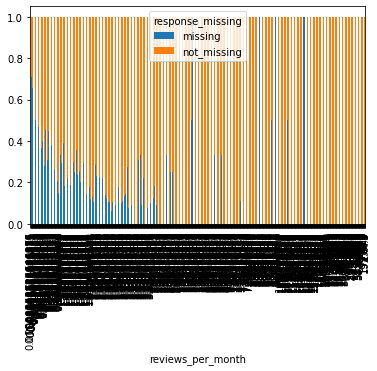

In [155]:
#print('NA count:',listings.host_response_time.groupby('host_is_superhost').isna().sum())

#print(listings.groupby('host_is_superhost').isna().sum())

#print('NA count:',listings.host_is_superhost.isna().sum())

listings['response_missing'] = listings.host_response_time
listings.response_missing = listings.response_missing.cat.add_categories('missing')
listings.response_missing = listings.response_missing.fillna('missing')

print(listings.groupby('response_missing').size())

listings.response_missing = listings.response_missing.cat.add_categories('not_missing')
#print(listings.response_missing.cat.categories)
#print(listings.groupby('response_missing').size())

listings.response_missing[listings.response_missing != 'missing'] = 'not_missing'


#listings.response_missing = listings.response_missing.fillna('missing', inplace=True)

#print(listings.response_missing)
#print(listings.groupby('response_missing')[['number_of_reviews']].apply(lambda x: x.isna().sum()))

#print((pd.crosstab(listings.response_missing, listings.reviews_per_month)))

response_missing = pd.DataFrame(pd.crosstab(listings.reviews_per_month, listings.response_missing, normalize='index'))
response_missing.plot.bar(stacked=True)

#response_missing = pd.DataFrame(pd.crosstab(listings.instant_bookable, listings.response_missing, normalize='index'))
#response_missing.plot.bar(stacked=True)



<AxesSubplot:xlabel='host_response_rate'>

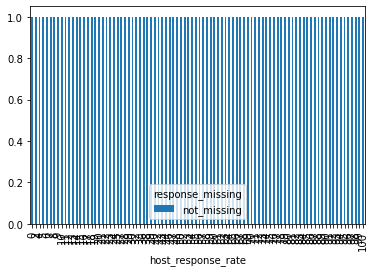

In [178]:
response_missing = pd.DataFrame(pd.crosstab(listings.host_response_rate, listings.response_missing, normalize='index'))
response_missing.plot.bar(stacked=True)

#listings.host_response_rate.plot.bar()

#sns.distplot(data=listings[listings.host_response_rate.notna()], x="host_response_rate", kind="kde")

#ax = sns.histplot(listings.host_response_rate.notna())


#print(listings.host_response_rate.describe())

#plt.hist(listings.host_response_rate.notna())




<AxesSubplot:xlabel='host_listings_count'>

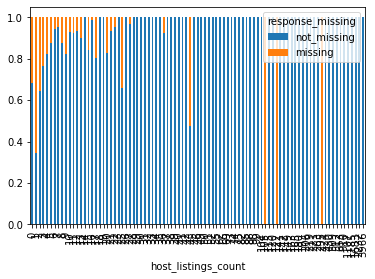

In [149]:

response_missing = pd.DataFrame(pd.crosstab(listings.host_listings_count, listings.response_missing, normalize='index'))
response_missing.plot.bar(stacked=True)

<AxesSubplot:xlabel='host_identity_verified'>

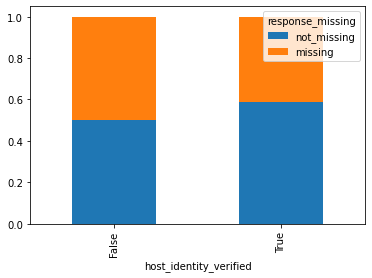

In [150]:

response_missing = pd.DataFrame(pd.crosstab(listings.host_identity_verified, listings.response_missing, normalize='index'))
response_missing.plot.bar(stacked=True)

response_missing  missing  not_missing
has_availability                      
False                2017           79
True                13659        20969


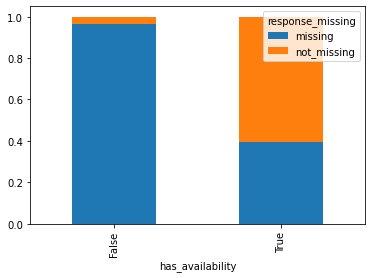

In [157]:

response_missing = pd.DataFrame(pd.crosstab(listings.has_availability, listings.response_missing, normalize='index'))
response_missing.plot.bar(stacked=True)

has_availability = pd.DataFrame(pd.crosstab(listings.has_availability, listings.response_missing))

print(has_availability)

<AxesSubplot:xlabel='review_scores_communication'>

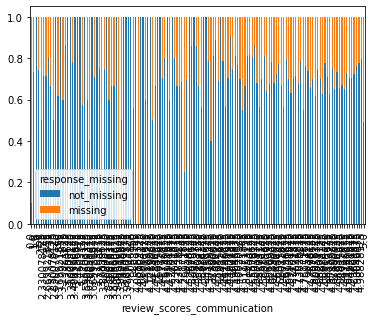

In [152]:

response_missing = pd.DataFrame(pd.crosstab(listings.review_scores_communication, listings.response_missing, normalize='index'))
response_missing.plot.bar(stacked=True)